# Submitted By Ruhan Siddiqui
# Here df1  for  leads_basic_details dataset 
# Here df2 for leads_demo_watched_details
# Here df2 for leads_interaction_details
# Here df4 for leads_reasons_for_no_interest
# Here df5 for sales_managers_assigned_leads_details


# Start Here For leads_basic_details part

In [167]:
import pandas as pd 
import numpy as np
from datetime import date,timedelta
import seaborn as sns
from matplotlib import pyplot as plt
df1=pd.read_csv("C:\\Users\\Ruhan\\OneDrive - Careismatic Brands, Inc\\Documents\\archive (1)\\leads_basic_details.csv")
df1.head(5)

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


# For finding missing values of all columns in dataset

In [31]:

df1.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

#  for finding outlier
#  here 211 and 116 values is outliers point  age column

In [26]:

df1['age'].unique()
#outliers 
df1.query('age > 50')

array([ 16,  20,  21,  22,  25,  18,  24, 211, 116], dtype=int64)

In [32]:
#outliers 
df1.query('age > 50')

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [34]:
#Remove outliers 
df12=df1.query("age<=50")
df12

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


# boxoplot is better way to detect outlier  and handle outliers

age    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

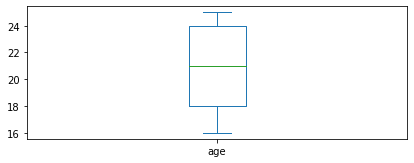

In [35]:

df12.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

# find no of peoplee in gender wise with age and current education using pivot 


In [38]:
# pivot table for meaningful summary of data
pivot = df12.pivot_table(index =['gender', 'current_education'], 
                       values =['age'], aggfunc ='count')
d=pd.DataFrame(pivot)
d

age
gender current_education          
FEMALE 10th Completed            4
       B.Tech                   75
       Degree                   25
       Intermediate             17
       Intermediate Completed    3
       Looking for Job          74
MALE   10th Completed            4
       B.Tech                   64
       Degree                   17
       Intermediate             23
       Intermediate Completed    9
       Looking for Job          43

In [45]:
#  count occurence of each category in current_education coulmns
df12.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

# find percentage of male and female contribution percentage in lead_gen source

In [49]:
p = (df12.groupby('lead_gen_source')['gender']
           .value_counts(normalize=True)
           .reset_index(name='perc'))
d1=pd.DataFrame(p)
d1

,lead_gen_source,gender,perc
0,SEO,MALE,0.520000
1,SEO,FEMALE,0.480000
2,email_marketing,FEMALE,0.520548
3,email_marketing,MALE,0.479452
4,social_media,FEMALE,0.705882
5,social_media,MALE,0.294118
6,user_referrals,MALE,0.515152
7,user_referrals,FEMALE,0.484848
8,website,FEMALE,0.542373
9,website,MALE,0.457627


In [50]:
# intermediate and intermediate completed is same so i want only intermediate
df12.current_education.unique()

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed', 'Intermediate Completed'], dtype=object)

In [51]:
df12.current_education.replace({'Intermediate Completed':'Intermediate'}, inplace=True)
df12

C:\Users\Ruhan\AppData\Local\Temp\ipykernel_760\3118168466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.current_education.replace({'Intermediate Completed':'Intermediate'}, inplace=True)


,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [52]:
df12.current_education.unique()

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed'], dtype=object)

#  lead By Current Education

<AxesSubplot:>

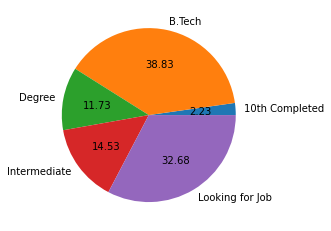

In [53]:

df12.groupby('current_education').size().plot(kind='pie', autopct='%.2f' ,ylabel='')

# find lead by gen_source

<AxesSubplot:>

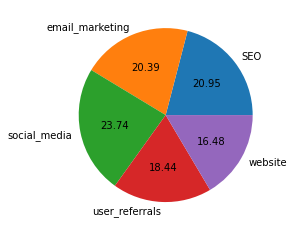

In [59]:

df12.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f' ,ylabel='')

# find lead by gender

<AxesSubplot:>

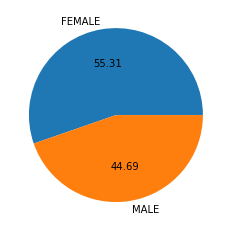

In [70]:
# Defining colors for the pie chart
#colors = ['pink', 'silver']
df12.groupby('gender').size().plot(kind='pie', autopct='%.2f',ylabel='')

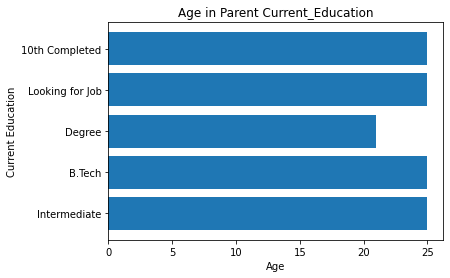

In [66]:
plt.barh(df12.current_education,df12.age)
# setting label of y-axis
plt.xlabel("Age")
# setting label of x-axis
plt.ylabel("Current Education")
plt.title("Age in Parent Current_Education")
plt.show()

#  Start Here For leads_demo_watched_details

In [68]:
df2=pd.read_csv("C:\\Users\\Ruhan\\OneDrive - Careismatic Brands, Inc\\Documents\\archive (1)\\leads_demo_watched_details.csv")
df2.head(5)

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


# For finding missing values of all columns in dataset

In [69]:

df2.isnull().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

#  for finding outlier
#  here 233 and 510 values is outliers point  age column

In [72]:
df2.watched_percentage.unique()

array([ 42,  81,  35,  38,  54,  52,  41,  50,  48,  44,  46,  51,  47,
        40,  36, 100,   5,  53,   8,  10,  11,  14,  17,  20,  23,  55,
        73,  26,  29,  32,  56,  59,  62,  60,  65,  70,  74,  75,  68,
        85,  71,  86,  87,  88,  89,   2,  90,  91,  92,  77,  80,  63,
        83,  25,   3,   4,  30,  45,  64, 510,  37,  66,  67,  49,  57,
        69,  61,  95,  15,  12,  13,  72,  19, 233,  27,  21,  16,  76,
        18,  79,  78,  22,  24,  28,  82,  84], dtype=int64)

# For detecting outlier using boxplot

watched_percentage    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

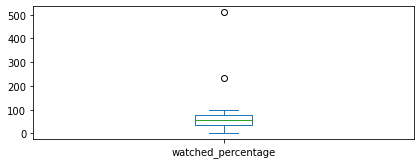

In [73]:
df2.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [76]:
#outliers 
df2.query('watched_percentage>100')

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [78]:
#Remove outliers 
df22=df2.query("watched_percentage<=100")
df22

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


watched_percentage    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

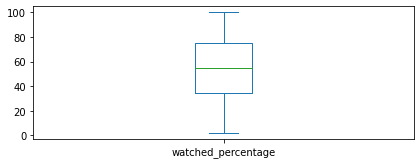

In [80]:
df22.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [81]:
df22['language'].unique()

array(['Telugu', 'Hindi', 'English'], dtype=object)

# Here we can see most watch lead in English which approx 58% and local language Telugu which is 32% then Hindi is 11%.

Text(0.5, 1.0, 'Language ')

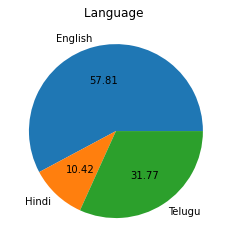

In [82]:
sort_lang = df22.groupby('language').size().plot(kind='pie', autopct='%.2f' ,ylabel='')
plt.title('Language ')

# Merger Two data frame 

In [85]:
df_merged = pd.merge(df12,df22, how='inner', on = 'lead_id')
df_merged

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,demo_watched_date,language,watched_percentage
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,1/4/2022,Telugu,42
1,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals,1/7/2022,Telugu,81
2,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals,1/2/2022,Telugu,35
3,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals,1/3/2022,Hindi,38
4,USR1006,16,MALE,Kochi,Intermediate,Doctor,user_referrals,1/12/2022,Hindi,54
...,...,...,...,...,...,...,...,...,...,...
186,USR1317,24,MALE,Mumbai,Looking for Job,Lawyer,social_media,2/25/2022,English,48
187,USR1318,21,MALE,Mumbai,Degree,IT Employee,email_marketing,2/25/2022,English,83
188,USR1319,22,FEMALE,Bengaluru,Looking for Job,Government Employee,email_marketing,2/28/2022,English,84
189,USR1343,24,FEMALE,Kochi,Looking for Job,IT Employee,social_media,1/25/2022,English,68


# find leads using  language and  gen_source

In [118]:
# pivot table for meaningful summary of data
pivot2 = df_merged.pivot_table(index =['language', 'lead_gen_source'], 
                       values =['lead_id'], aggfunc ='count')
d1=pd.DataFrame(pivot2)
d1

lead_id
language lead_gen_source         
English  SEO                   25
         email_marketing       28
         social_media          25
         user_referrals        17
         website               16
Hindi    SEO                    4
         email_marketing        5
         social_media           4
         user_referrals         4
         website                2
Telugu   SEO                   14
         email_marketing       11
         social_media          13
         user_referrals        11
         website               12

In [86]:
new_cities = df_merged.groupby('current_city').size()
new_cities


current_city
Bengaluru        32
Chennai          30
Hyderabad        40
Kochi            31
Mumbai           19
Visakhapatnam    39
dtype: int64

# Here We can See Visakhapatnam and Hyderabad cities have more lead as campare other cities.

Text(0, 0.5, 'Lead ')

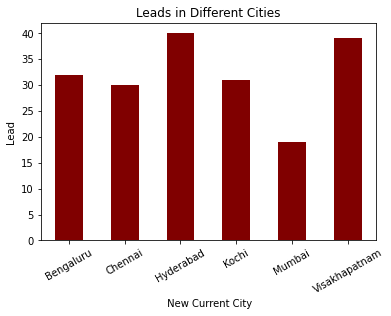

In [93]:

new_cities.plot(kind="bar",color='maroon')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Leads in Different Cities")
plt.xlabel(" New Current City")
plt.ylabel("Lead ")

In [94]:
new_language = df_merged.groupby('language').size()
new_language

language
English    111
Hindi       19
Telugu      61
dtype: int64

Text(0, 0.5, 'Lead ')

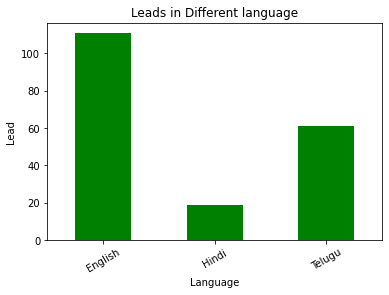

In [96]:
new_language.plot(kind="bar",color='green')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Leads in Different language")
plt.xlabel("Language")
plt.ylabel("Lead ")

# start Here For leads_interaction_details

In [107]:
df3=pd.read_csv("C:\\Users\\Ruhan\\OneDrive - Careismatic Brands, Inc\\Documents\\archive (1)\\leads_interaction_details.csv")
df3.head(5)

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


# find missing value

In [138]:
df3.isnull().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [109]:
df3.lead_stage.unique()

array(['lead', 'awareness', 'consideration', 'conversion'], dtype=object)

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [112]:
df3.lead_stage.value_counts()

lead             1547
consideration     331
awareness         250
conversion         64
Name: lead_stage, dtype: int64

In [114]:
df3.call_reason.unique()

array(['lead_introduction', 'demo_schedule', 'post_demo_followup',
       'followup_for_consideration', 'interested_for_conversion',
       'followup_for_conversion', 'successful_conversion',
       'demo_not_attended'], dtype=object)

In [116]:
df3.call_reason.value_counts()

demo_not_attended             701
lead_introduction             499
demo_schedule                 347
post_demo_followup            197
followup_for_conversion       189
interested_for_conversion     142
successful_conversion          64
followup_for_consideration     53
Name: call_reason, dtype: int64

# Merge two data frame

In [117]:
merged_interaction = pd.merge(df22,df3, how='inner', on = 'lead_id')
merged_interaction

,lead_id,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion
...,...,...,...,...,...,...,...,...,...
1555,USR1348,2/27/2022,English,72,JNR1012MG,lead,2/28/2022,successful,demo_not_attended
1556,USR1348,2/27/2022,English,72,JNR1012MG,awareness,2/28/2022,successful,post_demo_followup
1557,USR1348,2/27/2022,English,72,JNR1012MG,awareness,2/28/2022,successful,followup_for_consideration
1558,USR1348,2/27/2022,English,72,JNR1012MG,consideration,2/28/2022,successful,followup_for_conversion


#  find no of successful and unsuccessful status  with specific call_reason

In [121]:
# pivot table for meaningful summary of data
pivot3 = merged_interaction.pivot_table(index =['call_status','call_reason'], 
                       values =['lead_id'], aggfunc ='count')
d2=pd.DataFrame(pivot3)
d2

lead_id
call_status  call_reason                        
successful   demo_not_attended               385
             demo_schedule                   192
             followup_for_consideration       48
             followup_for_conversion         168
             interested_for_conversion       120
             lead_introduction               192
             post_demo_followup              195
             successful_conversion            63
unsuccessful demo_not_attended                45
             demo_schedule                    15
             followup_for_consideration        5
             followup_for_conversion          19
             interested_for_conversion        21
             lead_introduction                92

In [123]:
n_status = merged_interaction.groupby(['call_status','call_reason']).size()
n_status


call_status   call_reason               
successful    demo_not_attended             385
              demo_schedule                 192
              followup_for_consideration     48
              followup_for_conversion       168
              interested_for_conversion     120
              lead_introduction             192
              post_demo_followup            195
              successful_conversion          63
unsuccessful  demo_not_attended              45
              demo_schedule                  15
              followup_for_consideration      5
              followup_for_conversion        19
              interested_for_conversion      21
              lead_introduction              92
dtype: int64

Text(0, 0.5, 'Lead ')

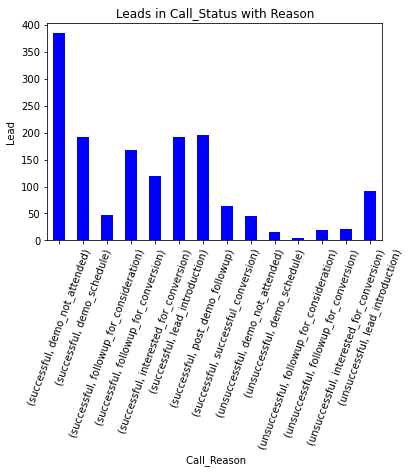

In [132]:

n_status.plot(kind="bar",color='blue')
plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Leads in Call_Status with Reason")
plt.xlabel(" Call_Reason")
plt.ylabel("Lead ")

# Here We can see  that approx 85% call successful and 15% unsuccessful status based by each leads

Text(0.5, 1.0, 'Call_Status')

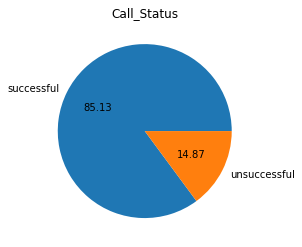

In [135]:
sort_lang = df3.groupby('call_status').size().plot(kind='pie', autopct='%.2f' ,ylabel='')
plt.title('Call_Status')

# Started Here leads_reasons_for_no_interest

In [136]:
df4=pd.read_csv("C:\\Users\\Ruhan\\OneDrive - Careismatic Brands, Inc\\Documents\\archive (1)\\leads_reasons_for_no_interest.csv")
df4.head(5)

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


# finding missing value

In [139]:
df4.isnull().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

# Handling missing value above three columns and this three colums all data in text format so i will use mode for finding most frequent values and then handle missing value

In [143]:
df4.reasons_for_not_interested_in_demo.mode()

0    Wants offline classes
Name: reasons_for_not_interested_in_demo, dtype: object

In [144]:
df4.reasons_for_not_interested_to_consider.mode()

0    Can't afford
Name: reasons_for_not_interested_to_consider, dtype: object

In [145]:
df4.reasons_for_not_interested_to_convert.mode()

0    Can't afford
Name: reasons_for_not_interested_to_convert, dtype: object

In [146]:
# Replacing values because both meaning same
df4['reasons_for_not_interested_in_demo'].replace({'Cannot afford':"Can't afford"}, inplace=True)


# filling missing value based on most frequent values of particular column

In [147]:
df4["reasons_for_not_interested_in_demo"].fillna("Wants offline classes", inplace = True)
df4["reasons_for_not_interested_to_consider"].fillna("Can't afford", inplace = True)
df4["reasons_for_not_interested_to_convert"].fillna("Can't afford", inplace = True)
 
 

#  here you can see no missing value below columns

In [148]:
#after filling missing value check
df4.isnull().sum()

lead_id                                   0
reasons_for_not_interested_in_demo        0
reasons_for_not_interested_to_consider    0
reasons_for_not_interested_to_convert     0
dtype: int64

In [149]:
df4.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Can't afford                         48
No time for student                  27
Student not interested in domain     28
Wants offline classes               186
Will join in final year               5
dtype: int64

# lead by reasons_for_not_interested_in_demo

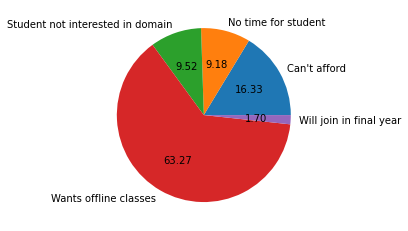

In [150]:
lead_no_interest= df4.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f', ylabel='')

In [151]:
n_con = df4.groupby('reasons_for_not_interested_to_consider').size()
n_con


reasons_for_not_interested_to_consider
Can't afford                        247
No time for student                   6
Student not interested in domain     14
Wants offline classes                25
Will join in final year               2
dtype: int64

# Here we can see most used reason is "can't afford" and least reason "will join in final year"

Text(0, 0.5, 'Lead ')

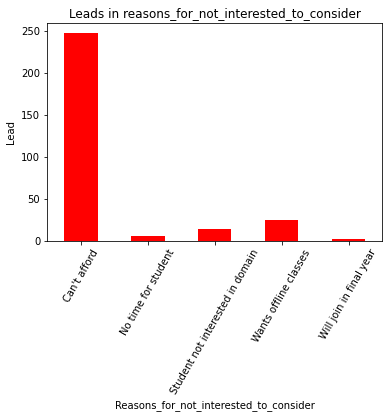

In [154]:
n_con.plot(kind="bar",color='red')
plt.xticks(rotation=60, horizontalalignment="center")
plt.title("Leads in reasons_for_not_interested_to_consider")
plt.xlabel("Reasons_for_not_interested_to_consider")
plt.ylabel("Lead ")


In [155]:
n_con1 = df4.groupby('reasons_for_not_interested_to_convert').size()
n_con1


reasons_for_not_interested_to_convert
Can't afford                        262
No time for student                   5
Student not interested in domain     10
Wants offline classes                10
Will join in final year               7
dtype: int64

Text(0, 0.5, 'Lead ')

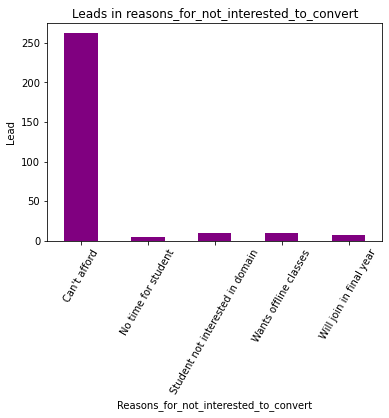

In [156]:
n_con1.plot(kind="bar",color='purple')
plt.xticks(rotation=60, horizontalalignment="center")
plt.title("Leads in reasons_for_not_interested_to_convert")
plt.xlabel("Reasons_for_not_interested_to_convert")
plt.ylabel("Lead ")

# Started Here sales_managers_assigned_leads_detail

In [159]:
df5=pd.read_csv("C:\\Users\\Ruhan\\OneDrive - Careismatic Brands, Inc\\Documents\\archive (1)\\sales_managers_assigned_leads_details.csv")
df5.head(5)

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


In [160]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [161]:
df5.isnull().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

In [162]:
n_con2 = df5.groupby('cycle').size()
n_con2


cycle
1    94
2    91
3    87
4    88
dtype: int64

# As You can see most used Cycle is 1  27% used and leat used cycle 3 24.17%

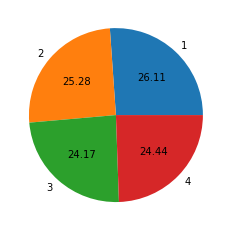

In [163]:
lead_no_interest= df5.groupby('cycle').size().plot(kind='pie', autopct='%.2f', ylabel='')

In [165]:
df5.snr_sm_id.unique()

array(['SNR501MG', 'SNR502MG', 'SNR503MG', 'SNR504MG'], dtype=object)

# Here we have total of 4 senior Managers, Each senior Managers have 80 to 85 junior sales managers.

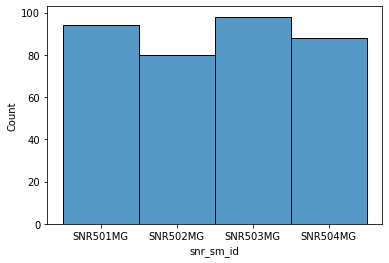

In [168]:
hist=sns.histplot(data=df5["snr_sm_id"],bins=4)

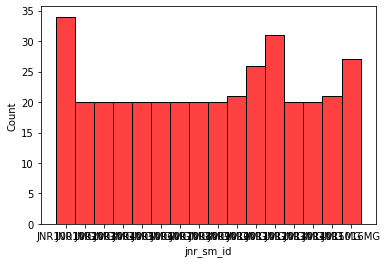

In [175]:
hist=sns.histplot(data=df5["jnr_sm_id"],kde=False, color='red', bins=17)